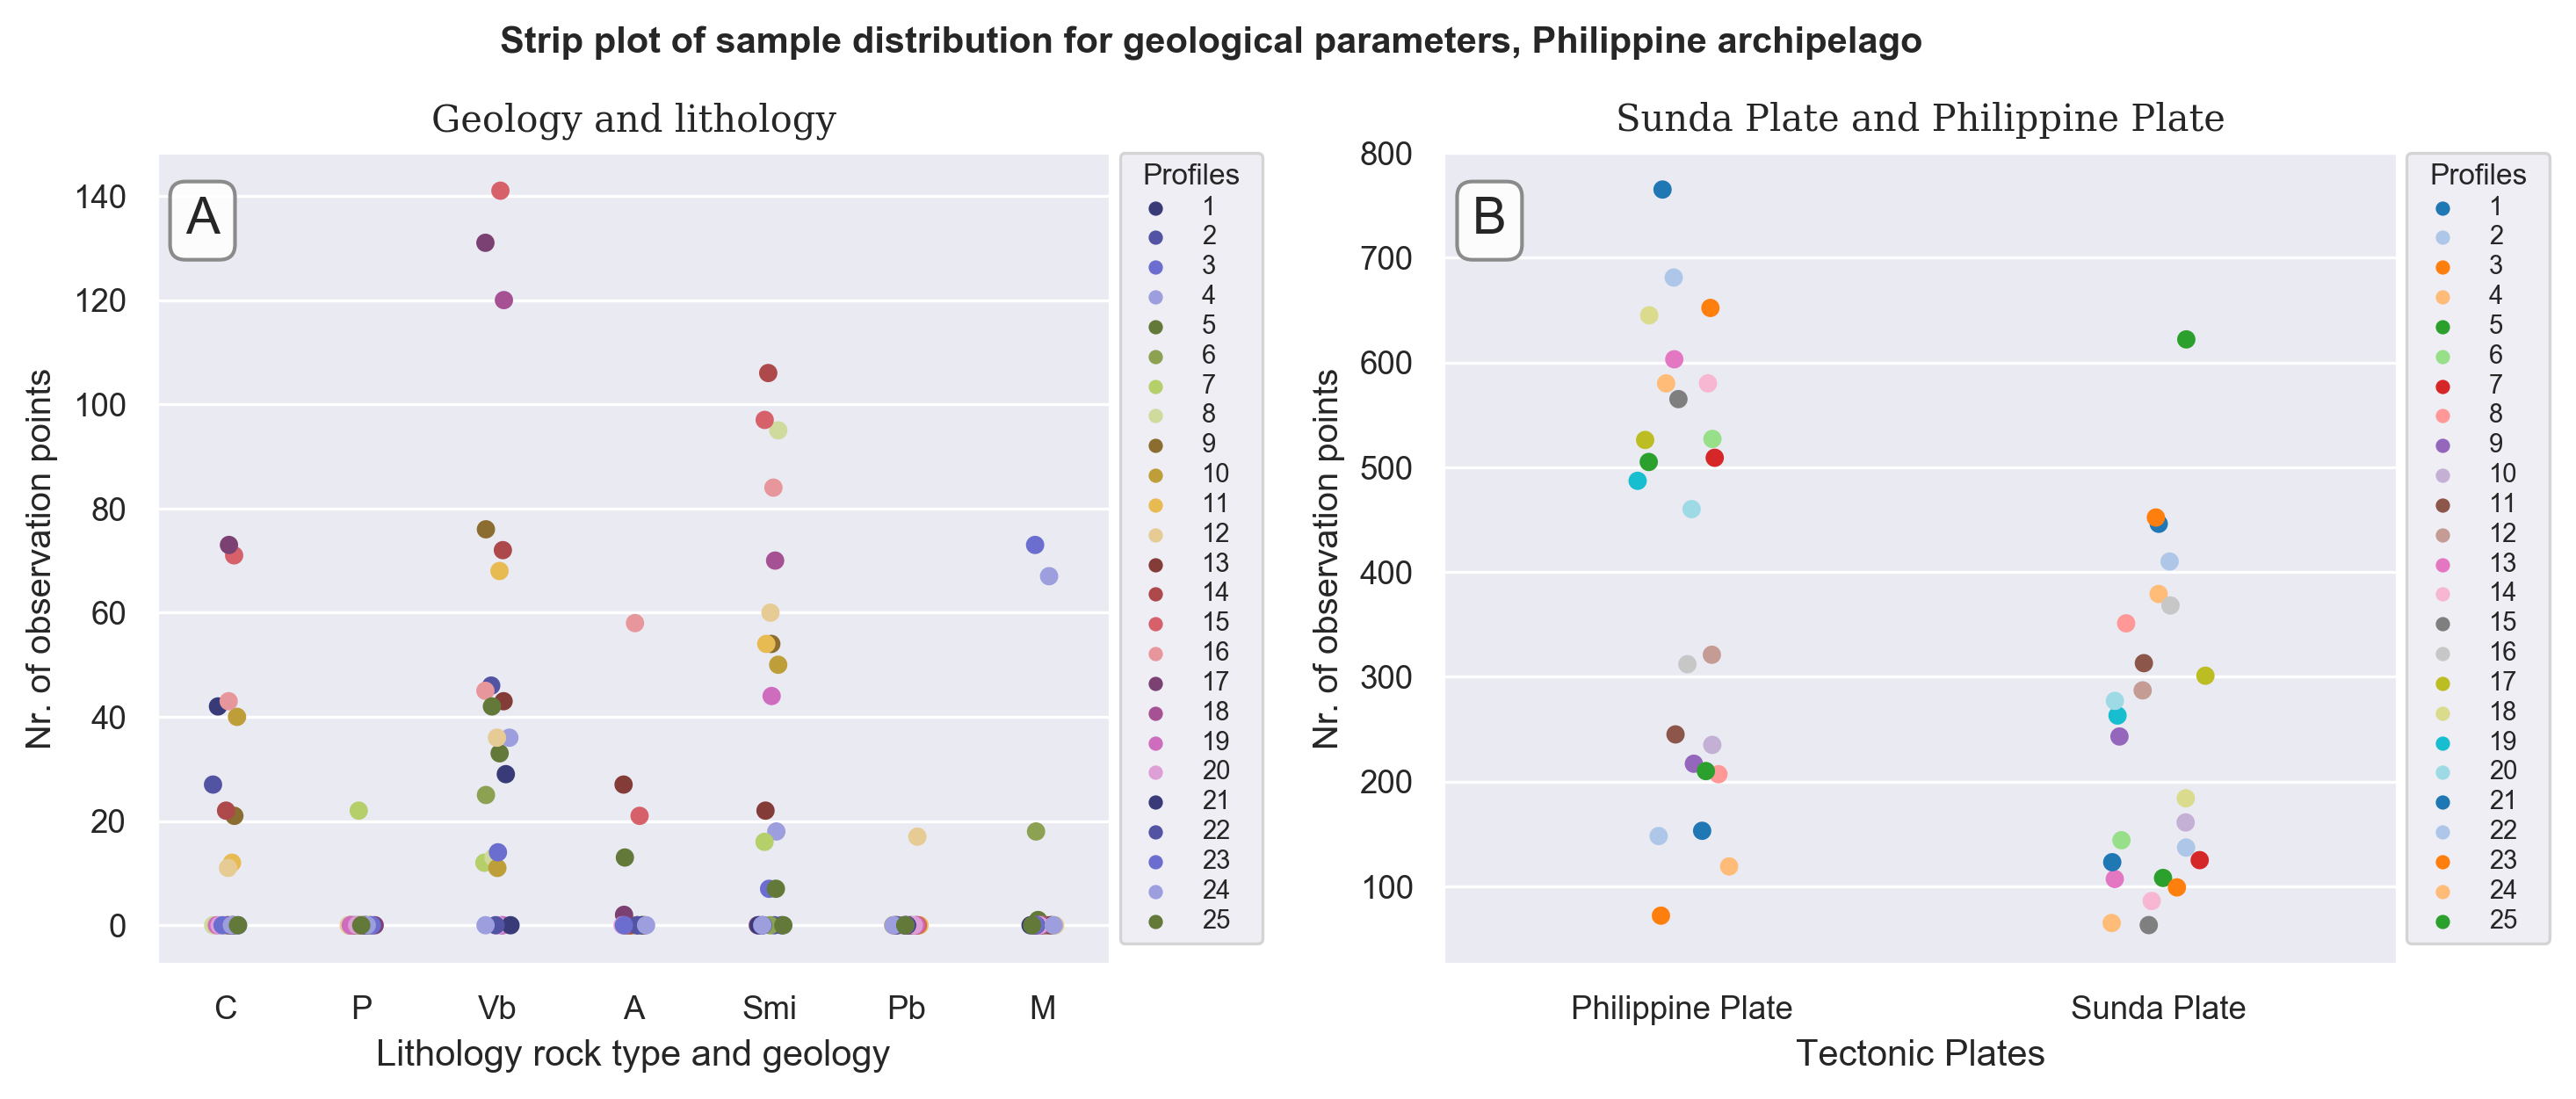

In [4]:
#!/usr/bin/env python
# coding: utf-8
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb

os.chdir('/Users/pauline/Documents/Python')
dfM = pd.read_csv("Tab-GeomorphPhil.csv")
sb.set_style('darkgrid')
sb.set_context('paper')

df1 = dfM.melt(id_vars=['profile'], 
              value_vars=['geol_c', 'geol_p', 'geol_vb', 
                          'geol_a', 'geol_smi', 'geol_pb', 'geol_m'],
              var_name='Geology', value_name='Nr. of observation points'
              )
df2 = dfM.melt(id_vars=['profile'], 
              value_vars=['plate_phil', 'plate_sunda'],
              var_name='Plates', value_name='Nr. of observation points'
              )

fig = plt.figure(figsize=(10.0, 4.0), dpi=300)
fig.suptitle('Strip plot of sample distribution for geological parameters, \
Philippine archipelago',
            fontsize=10, fontweight='bold', x=0.5, y=0.97)

def add_at(ax, t, loc=2):
    fp = dict(size=11)
    _at = AnchoredText(t, loc=loc, prop=fp)
    ax.add_artist(_at)
    return _at

# subplot 1
ax = fig.add_subplot(121)
sb.stripplot(x='Geology', y='Nr. of observation points', 
             hue = 'profile', palette='tab20b', data=df1, jitter=True
            )
plt.title('Geology and lithology', fontsize=10, fontfamily='serif')
plt.legend(title='Profiles', title_fontsize=8, 
           bbox_to_anchor=(1.01, 0.01, 0.15, 0.99),
           loc="upper right", ncol=1, mode="expand",
           borderaxespad=0., fontsize=7, 
           markerscale=.4, labelspacing=.2)
plt.xlabel('Lithology rock type and geology', 
           fontsize=10, fontfamily='sans-serif')
plt.xticks(np.arange(7), ('C', 'P', 'Vb', 'A', 'Smi', 'Pb', 'M'))
add_at(ax, "A", loc=2)

# subplot 2
ax = fig.add_subplot(122)
sb.stripplot(x='Plates', y='Nr. of observation points', 
             hue = 'profile', palette='tab20', data=df2, jitter=True)
plt.title('Sunda Plate and Philippine Plate', 
          fontsize=10, fontfamily='serif')
plt.legend(title='Profiles', title_fontsize=8, 
           bbox_to_anchor=(1.01, 0.01, 0.15, 0.99), 
           loc="upper right", ncol=1, mode="expand", 
           borderaxespad=0., fontsize=7,
           markerscale=.4, labelspacing=.2)
plt.xlabel('Tectonic Plates', 
           fontsize=10, fontfamily='sans-serif')
plt.xticks(np.arange(2), ('Philippine Plate', 'Sunda Plate'))
add_at(ax, "B", loc=2)

# visualization
plt.tight_layout()
plt.subplots_adjust(top=0.85, bottom=0.08,
                    left=0.10, right=0.95,
                    hspace=0.25, wspace=0.35
                    )
fig.savefig('plot_StripPhil.png', dpi=300)
plt.show()